# 产生数组

以下的函数大多与MATLAB类似

# arange, linspace 函数

In [2]:
import numpy as np
a1 = np.arange(1,10,1,dtype=int)
a2 = np.linspace(1,9,9,dtype=int)
print('a1:', a1)
print('a2:', a2)

a1: [1 2 3 4 5 6 7 8 9]
a2: [1 2 3 4 5 6 7 8 9]


# logspace

logspace(start, end, n),  从$10^{start}$开始到$10^{end}$结束, 共有n个均匀间隔, 默认是以10为底数的指数函数

In [6]:
a3 = np.logspace(0,5,6)
print('a3:', a3)

a3: [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05]


# meshgrid

产生一个网格坐标

In [7]:
x = np.arange(0,1,0.1)
y = np.arange(0,1,0.1)
(X, Y) = np.meshgrid(x, y)
print('X:', X)
print('Y:', Y)

X: [[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
 [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]]
Y: [[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3]
 [ 0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
 [ 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6]
 [ 0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7]
 [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0

/home/hecc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,0,'z')

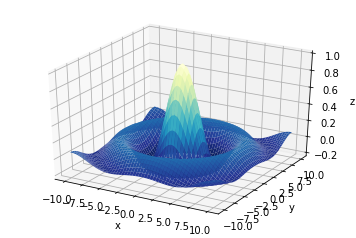

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

事实上，`x, y` 中有很多冗余的元素，这里提供了一个 `sparse` 的选项： 

In [26]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)

X, Y = np.meshgrid(x, y, sparse=True)
print('X:', X)
print('Y:', Y) #这并不影响最后的结果

X: [[-1.  -0.5  0.   0.5  1. ]]
Y: [[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]]


/home/hecc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Text(0.5,0,'Z')

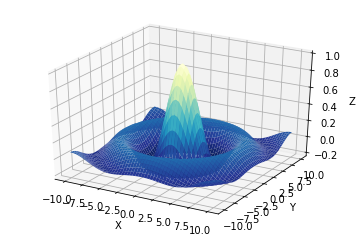

In [30]:
x = np.linspace(-10, 10, 51)
y = np.linspace(-10, 10, 51)
X, Y = np.meshgrid(x, y, sparse=True)#这样可以节省很大的空间, 属于用时间换取空间的做法
def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

`meshgrid` 可以设置轴排列的先后顺序：
- 默认为 `indexing='xy'` 即笛卡尔坐标，对于2维数组，返回行向量 `x` 和列向量 `y`
- 或者使用 `indexing='ij'` 即矩阵坐标，对于2维数组，返回列向量 `x` 和行向量 `y`。

In [36]:
x = np.arange(0,1,0.2)
y = np.arange(0,1,0.2)
[X, Y] = np.meshgrid(x, y, indexing='xy')
print('X:', X)
print('Y:', Y)

X: [[ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]]
Y: [[ 0.   0.   0.   0.   0. ]
 [ 0.2  0.2  0.2  0.2  0.2]
 [ 0.4  0.4  0.4  0.4  0.4]
 [ 0.6  0.6  0.6  0.6  0.6]
 [ 0.8  0.8  0.8  0.8  0.8]]


In [37]:
x = np.arange(0,1,0.2)
y = np.arange(0,1,0.2)
[X, Y] = np.meshgrid(x, y, indexing='ij')
print('X:', X)
print('Y:', Y)

X: [[ 0.   0.   0.   0.   0. ]
 [ 0.2  0.2  0.2  0.2  0.2]
 [ 0.4  0.4  0.4  0.4  0.4]
 [ 0.6  0.6  0.6  0.6  0.6]
 [ 0.8  0.8  0.8  0.8  0.8]]
Y: [[ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]
 [ 0.   0.2  0.4  0.6  0.8]]


# ogrid , mgrid

**Matlab**中有 `meshgrid` 的用法：
meshgrid(-1:.5:1, -1:.5:1)

**Numpy**的 `meshgrid` 并不支持这样的用法，但我们可以使用 `ogrid / mgrid` 来实现类似这样的用法。

`ogrid` 与 `mgrid` 的区别在于：
- `ogrid` 相当于 `meshgrid(indexing='ij', sparse=True)`
- `mgrid` 相当于 `meshgrid(indexing='ij', sparse=False)`

In [40]:
x, y = np.ogrid[-1:1:0.5, -1:1:0.5]
print('x:', x)
print('y:', y)

x: [[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]]
y: [[-1.  -0.5  0.   0.5]]


In [41]:
x, y = np.mgrid[-1:1:0.5, -1:1:0.5]
print('x:', x)
print('y:', y)

x: [[-1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5]]
y: [[-1.  -0.5  0.   0.5]
 [-1.  -0.5  0.   0.5]
 [-1.  -0.5  0.   0.5]
 [-1.  -0.5  0.   0.5]]


注意这里面都是不含下限的, 而且不同于MATLAB里面的用法
- matlab里面是 start:step:end, 包含end
- o/m grid里面是start:end:step, 不包含end

如果我们希望保存end, 我们可以用下面的技巧

In [44]:
x, y = np.ogrid[-1:1:5j, -1:1:5j]#这样表示我们希望得到-1到1均匀间隔的5个数
print('x:', x)
print('y:', y)

x: [[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]]
y: [[-1.  -0.5  0.   0.5  1. ]]


## r`_` , c`_`

产生行向量与列向量, 使用方式与上面的ogrid类似

In [45]:
np.r_[0:1:0.1]

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [47]:
np.c_[0:1:0.5]

array([[ 0. ],
       [ 0.5]])

In [48]:
np.r_[0:1:4j]

array([ 0.        ,  0.33333333,  0.66666667,  1.        ])

In [49]:
np.c_[0:1:4j]

array([[ 0.        ],
       [ 0.33333333],
       [ 0.66666667],
       [ 1.        ]])

## ones , zeros

生成全零数组或者全一数组, 数据类型默认为float64

In [53]:
a = np.zeros((2,2))
print('a:', a)
print('a.type', a.dtype)

a: [[ 0.  0.]
 [ 0.  0.]]
a.type float64


In [54]:
a = np.ones((2,2))
print('a:', a)
print('a.type', a.dtype)

a: [[ 1.  1.]
 [ 1.  1.]]
a.type float64


## empty
不同于MATLAB的空数组, 这是一个可以指定维度大小, 而且内部数据是1, 类型为float64

In [59]:
a = np.empty((2,2))
print('a:', a)
print('a.dtype:', a.dtype)

a: [[ 1.  1.]
 [ 1.  1.]]
a.dtype: float64


In [60]:
a.fill(3)
print(a)

[[ 3.  3.]
 [ 3.  3.]]


In [62]:
a[:] = 3
print(a)

[[ 3.  3.]
 [ 3.  3.]]


In [61]:
%timeit a = np.empty((2,2)); a.fill(5)

786 ns ± 2.06 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [63]:
%timeit a = np.empty((2,2)); a[:] = 5 #稍慢一些

1.25 µs ± 6.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## empty`_`like, ones`_`like, zeros`_`like

    empty_like(a)
    ones_like(a)
    zeros_like(a)

产生一个跟 `a` 大小一样，类型一样的对应数组。

In [64]:
a = np.array([1,2,3,4,5,6,7])

In [68]:
b1 = np.empty_like(a)
print('b1:', b1)
print('b1.dtype', b1.dtype)

b1: [140108440099720  93883879608368               0               0
               0               0              64]
b1.dtype int64


In [69]:
b2 = np.ones_like(a)
print('b1:', b2)
print('b1.dtype', b2.dtype)

b1: [1 1 1 1 1 1 1]
b1.dtype int64


In [70]:
b3 = np.zeros_like(a)
print('b1:', b3)
print('b1.dtype', b3.dtype)

b1: [0 0 0 0 0 0 0]
b1.dtype int64


原数组为int, empty_like, ones_like, zeros_like均为int类型, 不会使用默认的类型

## identity

identity(n), 默认类型为float64, 生成恒等矩阵

In [72]:
a = np.identity(2)
print('a:', a)
print('a.dtype', a.dtype)

a: [[ 1.  0.]
 [ 0.  1.]]
a.dtype float64


## 矩阵

产生矩阵

In [74]:
a = np.arange(12).reshape((4,3))
b = np.mat(a)
b

matrix([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

也可以使用MATLAB的语法传入一个字符串产生一个矩阵

In [75]:
A = np.mat('1,2,4;2,5,3;7,8,9')
A

matrix([[1, 2, 4],
        [2, 5, 3],
        [7, 8, 9]])

利用分块矩阵产生一个矩阵, 使用bmat函数

In [76]:
a = np.array([[ 1, 2],
              [ 3, 4]])
b = np.array([[10,20], 
              [30,40]])

np.bmat('a,b;b,a')

matrix([[ 1,  2, 10, 20],
        [ 3,  4, 30, 40],
        [10, 20,  1,  2],
        [30, 40,  3,  4]])

In [85]:
a = np.array([1,2,3,4])
b = np.mat([1,2,3,4])
print(a+1)
print(b+1) #加法减法都是自带补齐维度

[2 3 4 5]
[[2 3 4 5]]


写成matrix之后, 乘法就和array不一样了.

In [81]:
a = np.array([[1,2],[3,4]])
print(a*a)

[[ 1  4]
 [ 9 16]]


In [82]:
a = np.array([[1,2],[3,4]])
a = np.mat(a)
print(a*a)

[[ 7 10]
 [15 22]]


矩阵的连乘表示为`a**3 = a*a*a`

In [84]:
print('a**3:\n', a**3)
print('a*a*a:\n', a*a*a)

a**3:
 [[ 37  54]
 [ 81 118]]
a*a*a:
 [[ 37  54]
 [ 81 118]]
